In [20]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
data_path = '/content/mydrive/MyDrive/ML LAB/practice/cgpa.csv'
data= pd.read_csv(data_path)
data.head()

,Hour,CGPA
0,2,3.41
1,3,3.49
2,4,3.55
3,5,3.62
4,6,3.70


In [22]:
print("Dataset Size")
print("Row {} Column {}". format(data.shape[0],data.shape[1]))

Dataset Size
Row 9 Column 2


In [10]:
def linear(X,b0,b1):
  return [b0+ b1* x for x in X]

In [23]:
#b1 slope
def slope(X,Y):
  x_ = np.mean(X)
  y_ = np.mean(Y)
  rise = sum([(x-x_)*(y-y_) for x,y in zip(X,Y)])
  run = sum([(x-x_)**2 for x in X])
  return rise/run

In [24]:
# b0 - intercept
def intercept(X,Y, b1):
  x_ = np.mean(X)
  y_ = np.mean(Y)
  return y_ - (b1*x_)

In [30]:
final_data = data[['Hour','CGPA']]
predictor = data['Hour']
target = data['CGPA']

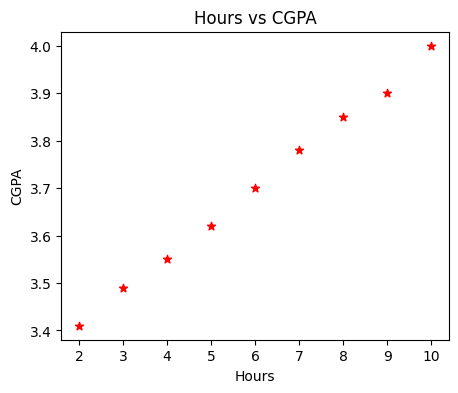

In [31]:
plt.figure(figsize=(5,4))
plt.scatter(predictor,target, color='red', marker='*')
plt.title('Hours vs CGPA')
plt.xlabel('Hours')
plt.ylabel('CGPA')
plt.show()

In [33]:
b1 = slope(predictor,target)
b0 = intercept(predictor,target,b1)
predicted = linear(predictor,b0,b1)
print("slope:",b1)
print("intercept:",b0)
print("Predicted value:",predicted)


slope: 0.07249999999999998
intercept: 3.2649999999999997
Predicted value: [3.4099999999999997, 3.4824999999999995, 3.5549999999999997, 3.6274999999999995, 3.6999999999999997, 3.7724999999999995, 3.8449999999999998, 3.9174999999999995, 3.9899999999999993]


Text(0, 0.5, 'CGPA')

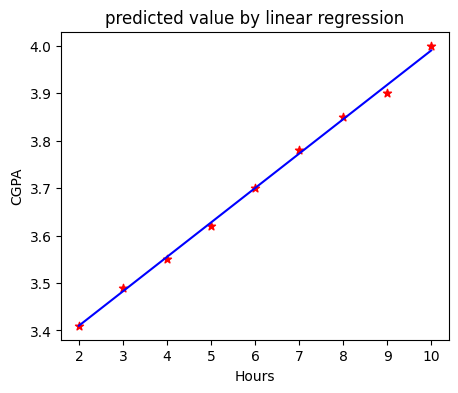

In [34]:
plt.figure(figsize=(5,4))
plt.scatter(predictor,target, color='red', marker='*')
plt.plot(predictor,predicted, color='blue')
plt.title('predicted value by linear regression')
plt.xlabel('Hours')
plt.ylabel('CGPA')

In [36]:
def r_squared(Y,Y_):
  ssr, sst, r_sqr = [0]
  y_ = np.mean(Y)
  ssr = sum([(y-y_)**2 for y in Y])
  sst = sum([(y-y_)**2 for y in Y_])
  return 1-(ssr/sst)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = LinearRegression()
predictor= np.array(predictor).reshape(-1,1)
reg = reg.fit(predictor,target)
Y_pred = reg.predict(predictor)


r2_score = reg.score(predictor,target)
print("Slope:",reg.coef_)
print("Intercept:",reg.intercept_)
print("Predicted value:",Y_pred)
print("R2 Score:",r2_score)

data['predict_y']= Y_pred
data['lose'] = target - Y_pred
print("Mean Squared Error:",mean_squared_error(target,Y_pred))
print("Mean Absolute Error:",mean_absolute_error(target,Y_pred))


data.head()


Slope: [[0.0725]]
Intercept: [3.265]
Predicted value: [[3.41  ]
 [3.4825]
 [3.555 ]
 [3.6275]
 [3.7   ]
 [3.7725]
 [3.845 ]
 [3.9175]
 [3.99  ]]
R2 Score: 0.9980221518987342
Mean Squared Error: 6.944444444444443e-05
Mean Absolute Error: 0.006666666666666821


,Hour,CGPA,predict_y,lose
0,2,3.41,3.4100,4.440892e-16
1,3,3.49,3.4825,7.500000e-03
2,4,3.55,3.5550,-5.000000e-03
3,5,3.62,3.6275,-7.500000e-03
4,6,3.70,3.7000,4.440892e-16
